# Debates about increasing minimum wage in the Netherlands

(Last updated: Jun 12, 2024)


The discussion about raising the minimum wage in the Netherlands is a contentious issue, eliciting strong opinions on both sides. During the Great Recession years (2007-2014), economic and social inequalities surged, amplifying interest in the minimum wage. Proponents argue that increasing the minimum wage would enhance the financial well-being of workers, thereby boosting consumer spending, reducing poverty, and fostering a fairer society. They also contend that higher wages could improve worker satisfaction and productivity while decreasing job turnover.

Conversely, critics express concerns that higher wages might lead to job losses, as businesses may struggle to bear the increased labor costs. This could spur greater automation and reduce opportunities for small and medium-sized enterprises, potentially harming the economy in the long term. The Spanish Central Bank, for instance, has warned about the potential negative effects of raising the minimum wage on competitiveness and employment (Ruesga-Benito, S. et al. 2017).

This research aims to explore both viewpoints by examining the effects of minimum wage changes on consumer spending and unemployment in the Netherlands. It will consider the broader economic context and the diverse elements that shape the outcomes of minimum wage policies. Factors such as consumer spending, GDP, and crime rates will be analyzed to provide a comprehensive understanding of its impact.

## Consumer spending and Minimum wage in the Netherlands
The plot below presents the trends in consumer spending and minimum wage over several decades. The blue line represents consumer spending in billions of US dollars, while the red line shows the minimum wage per month in US dollars. This visualization aims to explore the potential correlation between the minimum wage and consumer spending patterns over time.

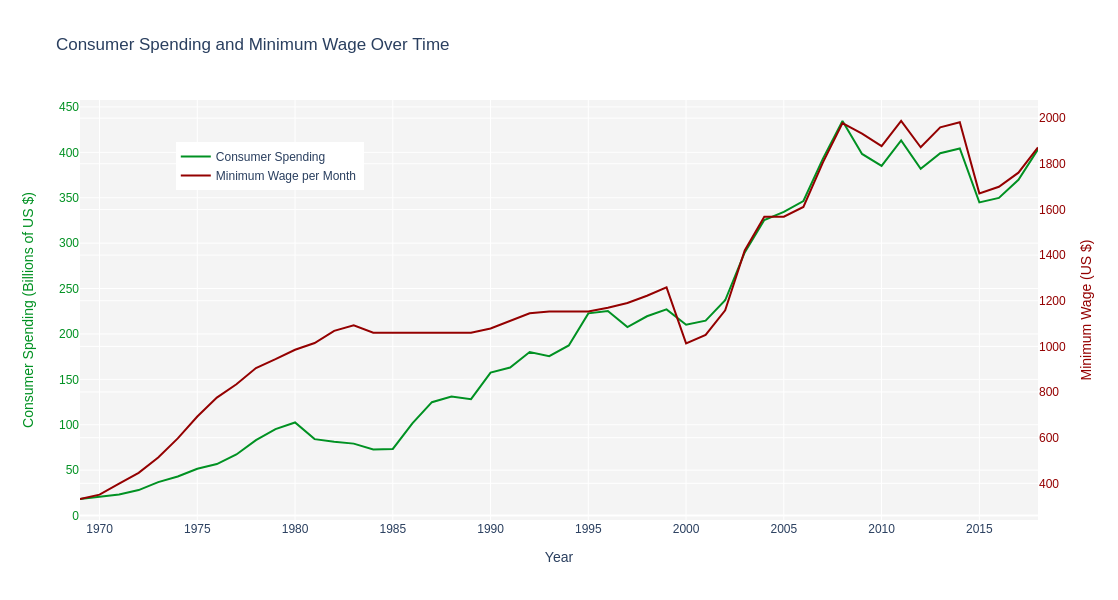

In [56]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Exchange rates from euros to dollars for each corresponding year. Source : https://www.macrotrends.net/2548/euro-dollar-exchange-rate-historical-chart
exchange_rates = {
    1969: 1.1747, 1970: 1.1747, 1971: 1.1747, 1972: 1.1747, 1973: 1.1747, 1974: 1.1747, 1975: 1.1747,
    1976: 1.1747, 1977: 1.1747, 1978: 1.1747, 1979: 1.1747, 1980: 1.1747, 1981: 1.1747, 1982: 1.1747,
    1983: 1.1747, 1984: 1.1747, 1985: 1.1747, 1986: 1.1747, 1987: 1.1747, 1988: 1.1747, 1989: 1.1747,
    1990: 1.1747, 1991: 1.1747, 1992: 1.1747, 1993: 1.1747, 1994: 1.1747, 1995: 1.1747, 1996: 1.1747,
    1997: 1.1747, 1998: 1.1747, 1999: 1.1747, 2000: 0.92, 2001: 0.90, 2002: 0.95, 2003: 1.13, 2004: 1.24,
    2005: 1.24, 2006: 1.26, 2007: 1.38, 2008: 1.47, 2009: 1.39, 2010: 1.33, 2011: 1.39, 2012: 1.29,
    2013: 1.33, 2014: 1.33, 2015: 1.11, 2016: 1.11, 2017: 1.13, 2018: 1.18
}

def convert_euro_to_dollar(year, amount_euro):
    return amount_euro * exchange_rates.get(year, 1)

def plot_consumer_spending_and_minimum_wage():
    minimum_wage_df = pd.read_csv("minimum_wage_data.csv")
    consumer_spending_df = pd.read_csv("netherlands-consumer-spending.csv")

    consumer_spending_df['year'] = consumer_spending_df['year'].str[:4]
    minimum_wage_df['year'] = minimum_wage_df['year'].astype(int)
    consumer_spending_df['year'] = consumer_spending_df['year'].astype(int)

    minimum_wage_df['minimum wage per month (dollar)'] = minimum_wage_df.apply(
        lambda row: convert_euro_to_dollar(row['year'], row['minimum wage per month (euro)']), axis=1
    )

    merged_df = pd.merge(consumer_spending_df, minimum_wage_df, on='year')

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=merged_df['year'], y=merged_df[' Billions of US $'],
                             mode='lines', name='Consumer Spending',
                             line=dict(color='#009122', width=2),
                             yaxis='y1'))

    fig.add_trace(go.Scatter(x=merged_df['year'], y=merged_df['minimum wage per month (dollar)'],
                             mode='lines', name='Minimum Wage per Month',
                             line=dict(color='#940000', width=2),
                             yaxis='y2'))

    fig.update_layout(
        title='Consumer Spending and Minimum Wage Over Time',
        xaxis_title='Year',
        yaxis=dict(
            title='Consumer Spending (Billions of US $)',
            titlefont=dict(color='#009122'),
            tickfont=dict(color='#009122')
        ),
        yaxis2=dict(
            title='Minimum Wage (US $)',
            titlefont=dict(color='#940000'),
            tickfont=dict(color='#940000'),
            overlaying='y',
            side='right'        ),
        legend=dict(x=0.1, y=0.9),
        height=600,
        plot_bgcolor='#f4f4f4'

    )

    fig.show()

plot_consumer_spending_and_minimum_wage()

The graph reveals a generally positive correlation between consumer spending and the minimum wage. As the minimum wage increases, consumer spending also tends to rise, suggesting that higher minimum wages may contribute to greater overall economic activity. However, the relationship is not perfectly linear, indicating that other economic factors likely influence consumer spending alongside changes in the minimum wage.

## Minimum wage and GDP per country
The maps below present a visual comparison of minimum wage and GDP per capita across different countries for the years 2001-2018. The first map illustrates the minimum wage in US dollars, while the second map shows GDP per capita. By examining these maps, one can gain insights into the economic landscape of various countries and the potential impact of minimum wage policies on economic performance.

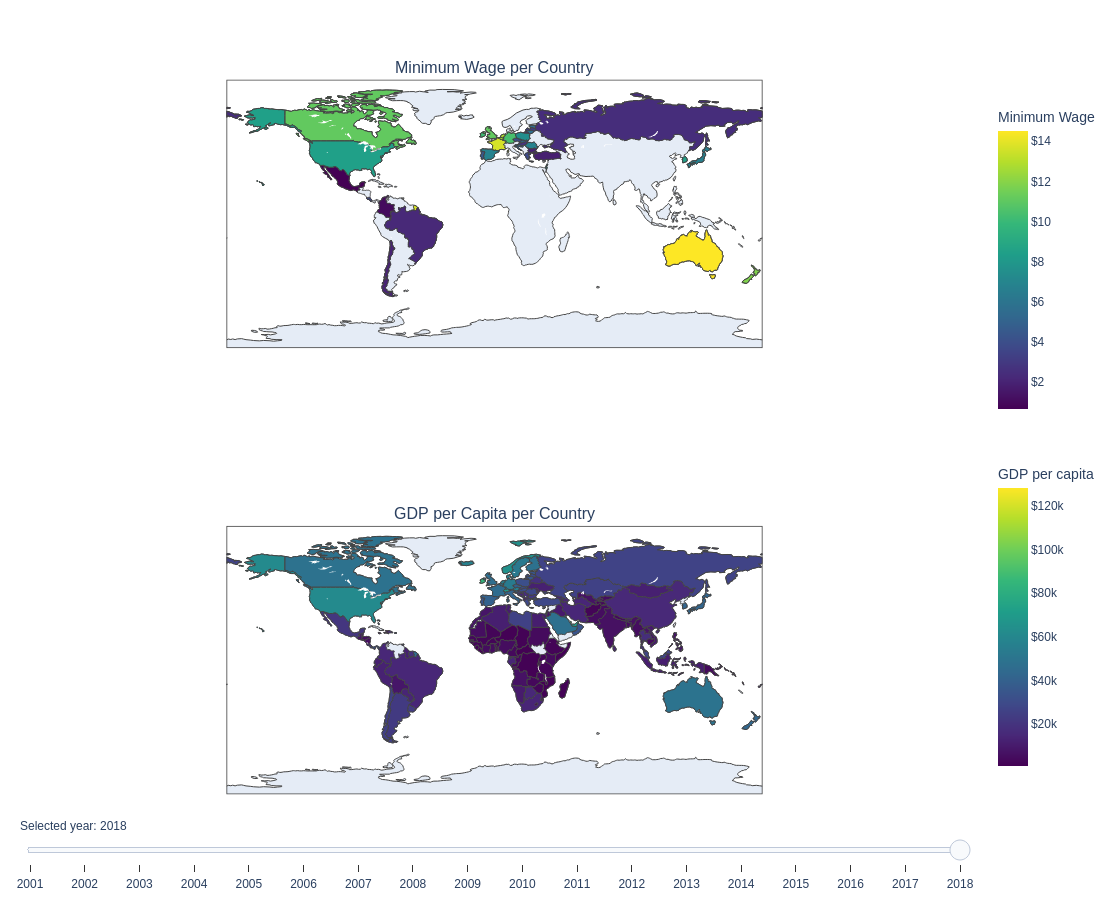

In [36]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

df_minimum_wage = pd.read_csv('minimum_wage_worldwide.csv')
df_gdp = pd.read_csv('gdp-per-capita-worldbank.csv')

df_minimum_wage = df_minimum_wage[df_minimum_wage['TIME_PERIOD'] <= 2018]
df_gdp = df_gdp[df_gdp['Year'] <= 2018]

minimum_wage_years = sorted(df_minimum_wage['TIME_PERIOD'].unique())
minimum_wage_traces = []
for i, year in enumerate(minimum_wage_years):
    df_minimum_wage_year = df_minimum_wage[df_minimum_wage['TIME_PERIOD'] == year]
    minimum_wage_trace = go.Choropleth(
        locations=df_minimum_wage_year['REF_AREA'],
        locationmode='ISO-3',
        z=df_minimum_wage_year['OBS_VALUE'],
        colorscale='Viridis',
        hovertemplate='<b>%{location}</b><br>Minimum wage: %{z}<extra></extra>',
        visible=(True if year == 2018 else False),
        colorbar=dict(
            title='Minimum Wage',
            tickprefix='$',
            len=0.45,
            y=0.75
        ),
    )
    minimum_wage_traces.append(minimum_wage_trace)

gdp_years = sorted(df_gdp['Year'].unique())
gdp_traces = []
for i, year in enumerate(gdp_years):
    df_gdp_year = df_gdp[df_gdp['Year'] == year]
    gdp_trace = go.Choropleth(
        locations=df_gdp_year['Code'],
        z=df_gdp_year["GDP per capita, PPP (constant 2017 international $)"],
        text=df_gdp_year['Entity'],
        colorscale='Viridis',
        hovertemplate='<b>%{text}</b><br>GDP per capita: %{z}<extra></extra>',
        visible=(True if year == 2018 else False),
        colorbar=dict(
            title='GDP per capita',
            tickprefix='$',
            len=0.45,
            y=0.25
        ),
    )
    gdp_traces.append(gdp_trace)

combined_traces = minimum_wage_traces + gdp_traces

slider_steps = []
for i, year in enumerate(minimum_wage_years):
    step = {
        'method': 'update',
        'args': [
            {'visible': [i == j for j in range(len(minimum_wage_traces))] + [i == j for j in range(len(gdp_traces))]},
        ],
        'label': str(year)
    }
    slider_steps.append(step)

fig_combined = make_subplots(
    rows=2, cols=1,
    subplot_titles=("Minimum Wage per Country", "GDP per Capita per Country"),
    specs=[[{'type': 'choropleth'}], [{'type': 'choropleth'}]]
)

for trace in minimum_wage_traces:
    fig_combined.add_trace(trace, row=1, col=1)

for trace in gdp_traces:
    fig_combined.add_trace(trace, row=2, col=1)

fig_combined.update_layout(
    width=800,
    height=900,
    sliders=[{
        'active': minimum_wage_years.index(2018),
        'currentvalue': {'prefix': 'Selected year: '},
        'steps': slider_steps
    }],
    margin={'t': 80, 'r': 20, 'b': 80, 'l': 20}
)

fig_combined.show()

From the maps, it is evident that there is significant variation in both minimum wage levels and GDP per capita across countries. The first map shows that countries like Australia, New Zealand, and several Western European nations have relatively high minimum wages. Correspondingly, the second map indicates that these countries also enjoy higher GDP per capita, reflecting greater economic prosperity. Conversely, regions with lower minimum wages, such as Russia, generally exhibit lower GDP per capita. Countries with higher GDP per capita tend to have higher minimum wages, indicating a potential correlation between economic prosperity and wage policies. However, there are also exceptions, suggesting that other factors, such as cost of living and economic structure, play a crucial role in determining minimum wage levels. This analysis provides a foundational understanding for discussions on the implications of raising minimum wages in different economic contexts.

## Percentage of Workers Earning Minimum Wage by Age Range in 2018 in the Netherlands
The below graph provides an insightful look into the distribution of minimum wage workers across various age groups. The highest percentage of minimum wage workers is in the "20 to 25 years" age range, approaching 20%. Younger age groups, "0 to 15 years" and "15 to 20 years," also show high percentages above 15%. From "25 to 60 years," the percentages remain low, around 5% or less. There’s a noticeable rise in the "65 to 75 years" age range, nearing 10%, and the "75 years or older" group also approaches 20%. 

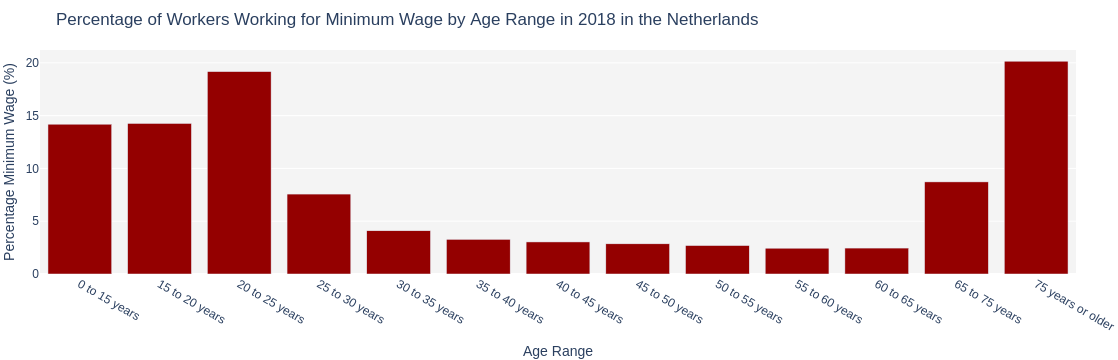

In [54]:
data = pd.read_csv('minimumloon_werknemers.csv')

df = pd.DataFrame(data)

fig = px.bar(
    df,
    x="age",
    y="percentage_minimum_wage",
    title="Percentage of Workers Working for Minimum Wage by Age Range in 2018 in the Netherlands",
    labels={"percentage_minimum_wage": "Percentage Minimum Wage (%)", "Age Range": "Age Range"}
)

fig.update_traces(marker_color='#940000', showlegend=False)

fig.update_layout(
    xaxis_title='Age Range',
    yaxis_title='Percentage Minimum Wage (%)',
    title="Percentage of Workers Working for Minimum Wage by Age Range in 2018 in the Netherlands",
    margin=dict(l=0, r=0, t=50, b=0),
    plot_bgcolor='#f4f4f4'

)

fig.show()

This graph indicates that the majority of people in the Netherlands do not work for minimum wage. This conclusion is based on the observation that, for most age ranges depicted in the graph, the percentage of workers earning minimum wage is significantly below 20%

## Minimum Wage per Month and Theft/Break-ins
The graph illustrates the relationship between minimum wage per month and the incidence of thefts and break-ins from 2013 to 2018. This data provides an overview of how changes in minimum wage levels might correlate with crime rates, particularly property crimes such as thefts and break-ins.

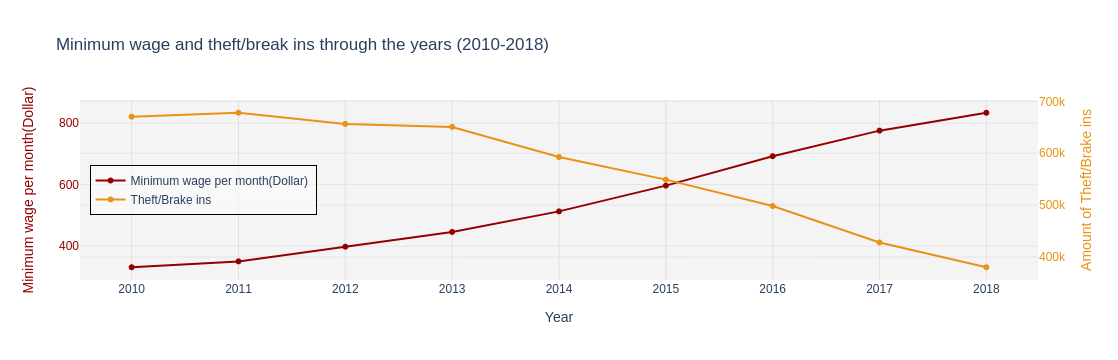

In [51]:
# Exchange rates from euros to dollars for each corresponding year. Source : https://www.macrotrends.net/2548/euro-dollar-exchange-rate-historical-chart
exchange_rates = {
    1969: 1.1747, 1970: 1.1747, 1971: 1.1747, 1972: 1.1747, 1973: 1.1747, 1974: 1.1747, 1975: 1.1747,
    1976: 1.1747, 1977: 1.1747, 1978: 1.1747, 1979: 1.1747, 1980: 1.1747, 1981: 1.1747, 1982: 1.1747,
    1983: 1.1747, 1984: 1.1747, 1985: 1.1747, 1986: 1.1747, 1987: 1.1747, 1988: 1.1747, 1989: 1.1747,
    1990: 1.1747, 1991: 1.1747, 1992: 1.1747, 1993: 1.1747, 1994: 1.1747, 1995: 1.1747, 1996: 1.1747,
    1997: 1.1747, 1998: 1.1747, 1999: 1.1747, 2000: 0.92, 2001: 0.90, 2002: 0.95, 2003: 1.13, 2004: 1.24,
    2005: 1.24, 2006: 1.26, 2007: 1.38, 2008: 1.47, 2009: 1.39, 2010: 1.33, 2011: 1.39, 2012: 1.29,
    2013: 1.33, 2014: 1.33, 2015: 1.11, 2016: 1.11, 2017: 1.13, 2018: 1.18
}

def convert_euro_to_dollar(year, amount_euro):
    return amount_euro * exchange_rates.get(year, 1)

data = pd.read_csv('theft_and_burglary.csv')

jaren = data['year'].tolist()
diefstal_inbraak = data['theft_and_burglary'].tolist()

minimum_wage_df = pd.read_csv("minimum_wage_data.csv")
minimum_wage_df['year'] = minimum_wage_df['year'].astype(int)
minimum_wage_df['minimum wage per month (dollar)'] = minimum_wage_df.apply(
    lambda row: convert_euro_to_dollar(row['year'], row['minimum wage per month (euro)']), axis=1
)

min_wage_month = minimum_wage_df['minimum wage per month (dollar)'].tolist()

fig = go.Figure()

fig.add_trace(go.Scatter(x=jaren, y=min_wage_month, mode='lines+markers', name='Minimum wage per month(Dollar)', line=dict(color='#940000')))

fig.add_trace(go.Scatter(x=jaren, y=diefstal_inbraak, mode='lines+markers', name='Theft/Brake ins', line=dict(color='#e89217'), yaxis='y2'))

fig.update_layout(
    yaxis=dict(
        title='Minimum wage per month(Dollar)',
        titlefont=dict(color='#940000'),
        tickfont=dict(color='#940000'),
        gridcolor='lightgrey',
        gridwidth=0.5
    ),
    yaxis2=dict(
        title='Amount of Theft/Brake ins',
        titlefont=dict(color='#e89217'),
        tickfont=dict(color='#e89217'),
        overlaying='y',
        side='right',
        gridcolor='lightgrey',
        gridwidth=0.5
    ),
    title='Minimum wage and theft/break ins through the years (2010-2018)',
    xaxis_title='Year',
    xaxis=dict(
        gridcolor='lightgrey',
        gridwidth=0.6
    ),
    legend=dict(
        x=0.01,
        y=0.5,
        bgcolor='rgba(255, 255, 255, 0.5)',
        bordercolor='black',
        borderwidth=1
    ),
    plot_bgcolor='#f4f4f4'
)

The graph shows a clear trend where the minimum wage increases steadily from 2013 to 2018, while at the same time, the number of thefts and break-ins decreases. This inverse relationship suggests that higher minimum wages may contribute to a reduction in property crimes. By improving the financial stability of low-income workers, increasing the minimum wage might reduce the incentive for engaging in criminal activities. This finding supports arguments that raising the minimum wage can have broader social benefits beyond just economic improvements for workers.

## Impact of minimum wage on the unemployment rate
The plot below illustrates the relationship between the unemployment rate and the minimum wage over a series of years. The blue bars represent the unemployment rate as a percentage, while the green bars indicate the minimum wage in euros per month. This visualization aims to provide insights into how changes in the minimum wage might correlate with fluctuations in the unemployment rate.


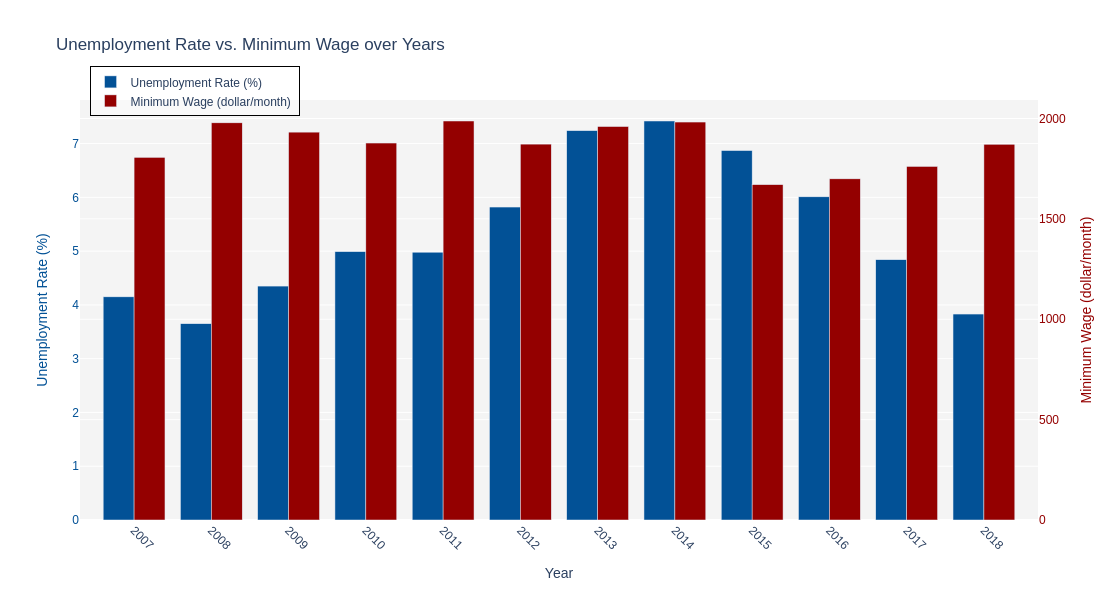

In [53]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Function to convert euro to dollar using given exchange rates
exchange_rates = {
    1969: 1.1747, 1970: 1.1747, 1971: 1.1747, 1972: 1.1747, 1973: 1.1747, 1974: 1.1747, 1975: 1.1747,
    1976: 1.1747, 1977: 1.1747, 1978: 1.1747, 1979: 1.1747, 1980: 1.1747, 1981: 1.1747, 1982: 1.1747,
    1983: 1.1747, 1984: 1.1747, 1985: 1.1747, 1986: 1.1747, 1987: 1.1747, 1988: 1.1747, 1989: 1.1747,
    1990: 1.1747, 1991: 1.1747, 1992: 1.1747, 1993: 1.1747, 1994: 1.1747, 1995: 1.1747, 1996: 1.1747,
    1997: 1.1747, 1998: 1.1747, 1999: 1.1747, 2000: 0.92, 2001: 0.90, 2002: 0.95, 2003: 1.13, 2004: 1.24,
    2005: 1.24, 2006: 1.26, 2007: 1.38, 2008: 1.47, 2009: 1.39, 2010: 1.33, 2011: 1.39, 2012: 1.29,
    2013: 1.33, 2014: 1.33, 2015: 1.11, 2016: 1.11, 2017: 1.13, 2018: 1.18
}

def convert_euro_to_dollar(year, amount_euro):
    return amount_euro * exchange_rates.get(year, 1)

minimum_wage_df = pd.read_csv("minimum_wage_data.csv")
consumer_spending_df = pd.read_csv("netherlands-unemployment-rate.csv")

minimum_wage_df['year'] = minimum_wage_df['year'].astype(int)
consumer_spending_df['year'] = consumer_spending_df['year'].astype(int)

merged_df = pd.merge(consumer_spending_df, minimum_wage_df, on='year')

merged_df = merged_df[merged_df['year'] >= 2007]

merged_df['minimum wage per month (dollar)'] = merged_df.apply(
    lambda row: convert_euro_to_dollar(row['year'], row['minimum wage per month (euro)']),
    axis=1
)

years = merged_df['year']
unemployment_rate = merged_df[' Unemployment Rate (%)']
minimum_wage_dollar = merged_df['minimum wage per month (dollar)']

fig = go.Figure()

fig.add_trace(go.Bar(
    x=years - 0.2,
    y=unemployment_rate,
    name='Unemployment Rate (%)',
    marker=dict(color='#025196'),
    yaxis='y1',
    width=0.4
))

fig.add_trace(go.Bar(
    x=years + 0.2,
    y=minimum_wage_dollar,
    name='Minimum Wage (dollar/month)',
    marker=dict(color='#940000'),
    yaxis='y2',
    width=0.4
))

fig.update_layout(
    title='Unemployment Rate vs. Minimum Wage over Years',
    xaxis=dict(
        title='Year',
        tickmode='array',
        tickvals=years,
        ticktext=years,
        tickangle=45
    ),
    yaxis=dict(
        title='Unemployment Rate (%)',
        titlefont=dict(color='#025196'),
        tickfont=dict(color='#025196'),
        side='left'
    ),
    yaxis2=dict(
        title='Minimum Wage (dollar/month)',
        titlefont=dict(color='#940000'),
        tickfont=dict(color='#940000'),
        overlaying='y',
        side='right'
    ),
    legend=dict(
        x=0.01,
        y=1.08,
        bgcolor='rgba(255, 255, 255, 0.5)',
        bordercolor='black',
        borderwidth=1
    ),
    plot_bgcolor='#f4f4f4',
    barmode='group',
    bargap=0.15,
    height=600
)

fig.show()


From the graph, it is evident that there is no consistent pattern indicating that higher minimum wages lead to higher unemployment rates or vice versa. In some years, increases in the minimum wage coincide with higher unemployment rates, while in other years, they do not. This suggests that other factors may also play significant roles in influencing unemployment rates, and the impact of minimum wage adjustments on employment is complex and multifaceted.

# Summary
The debate over increasing the minimum wage is multifaceted, with arguments for and against its adjustment. This project aimed to explore various perspectives by analyzing the relationship between the minimum wage and several key economic and social factors.

We began by investigating the unemployment rate in relation to minimum wage levels. The analysis revealed no consistent pattern, suggesting that higher minimum wages do not necessarily correlate with higher unemployment rates. This indicates that other factors also play significant roles in determining employment levels.

Next, we examined consumer spending in relation to changes in the minimum wage. The data showed a positive correlation, with increases in the minimum wage generally accompanying higher consumer spending. This suggests that higher minimum wages may stimulate economic activity by increasing the purchasing power of low-income workers.

Further analysis was conducted to understand the impact of minimum wage levels on GDP across different countries. This provided insights into whether higher minimum wages could support broader economic growth, though the results highlighted the complexity of such relationships.

We also explored the connection between minimum wage levels and crime rates, specifically theft and break-ins. The findings offered insights into whether improving financial stability through higher wages could potentially reduce crime rates.

Additionally, we considered the impact of minimum wage adjustments across different age categories. This analysis revealed how wage policies might affect various age groups differently, emphasizing the need for targeted policy considerations.

Overall, the project presented a comprehensive view of the minimum wage debate, showcasing potential benefits of increasing the minimum wage. While the data highlighted the complexity of the issue, it underscored the importance of considering a wide range of factors in policymaking decisions. Further research is necessary to fully understand the implications and to make informed decisions about minimum wage adjustments. We did not find compelling evidence against increasing the minimum wage, making it clear that the arguments in favor of increasing the minimum wage are stronger. However, we can't say for sure, and more investigation is needed.

## Reference

Ruesga-Benito, S. M., González-Laxe, F. I., & Picatoste, J. (2017). The debate on the economic effects of minimum wage legislation. European Journal of Government and Economics, 6(2), 171–190. https://doi.org/10.17979/ejge.2017.6.2.4328
